In [1]:
# this only draws the images, not interactive / zoom-able
%matplotlib inline

In [2]:
"""
================================================
Coding - Decoding simulation of a random message
================================================

This example shows a simulation of the transmission of a binary message
through a gaussian white noise channel with an LDPC coding and decoding system.
"""
from typing import Optional, Union    # , Tuple

import numpy as np
from numpy import ndarray

from pyldpc import make_ldpc, decode, get_message, encode
from matplotlib import pyplot as plt

n = 30
d_v = 2
d_c = 3
seed = np.random.RandomState(42)

In [3]:
##################################################################
# First we create an LDPC code i.e a pair of decoding and coding matrices
# H and G. H is a regular parity-check matrix with d_v ones per row
# and d_c ones per column

H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

n, k = G.shape
print("Number of coded bits:", k)

Number of coded bits: 11


In [4]:
##################################################################
# Now we simulate transmission for different levels of noise and
# compute the percentage of errors using the bit-error-rate score
# The coding and decoding can be done in parallel by column stacking.

errors = []
snrs: Union[ndarray, tuple[ndarray, Optional[float]]] = np.linspace(-2, 10, 20)
v = np.arange(k) % 2  # fixed k bits message
n_trials = 50  # number of transmissions with different noise
V = np.tile(v, (n_trials, 1)).T  # stack v in columns

for snr in snrs:
    y = encode(G, V, snr, seed=seed)
    D = decode(H, y, snr)
    error = 0.
    for i in range(n_trials):
        x = get_message(G, D[:, i])
        error += abs(v - x).sum() / (k * n_trials)
    errors.append(error)

/home/cwm/git/git.c-w-m/ec_dev/src/pyldpc/pyldpc/decoder.py:62: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  warnings.warn("""Decoding stopped before convergence. You may want


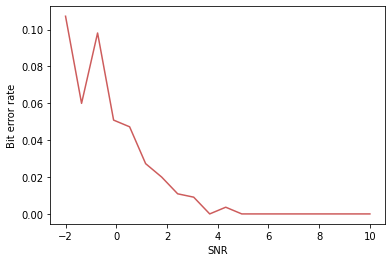

In [5]:
plt.figure()
plt.plot(snrs, errors, color="indianred")
plt.ylabel("Bit error rate")
plt.xlabel("SNR")
plt.show()